# Heart Disease Prediction using Machine Learning Algorithms

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import rainbow
%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

['.ipynb_checkpoints', 'app.py', 'dnn_model.pkl', 'dt_model.pkl', 'fnn_model.pkl', 'heart.csv', 'Heart_Disease_Prediction.ipynb', 'knn_classifier.pkl', 'lr_model.pkl', 'mlp_model.pkl', 'rf_model.pkl', 'svm_model.pkl', 'templates']


In [3]:
heartData = pd.read_csv("C:/Users/mohan/Documents/Projects/HeartDiseasePrediction/heart.csv")
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heartData.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


# Missing Percentage

In [7]:
missing_percentage = (heartData.isnull().sum() / len(heartData)) * 100
print(missing_percentage)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [8]:
corr = heartData.corr()
corr.style.background_gradient(cmap='Spectral')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [9]:
X = heartData.drop(['target'], axis = 1)
y = heartData['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train ->",X_train.shape[0], "X_Test ->",X_test.shape[0], "Y_Train ->", y_train.shape[0], "Y_Test ->", y_test.shape[0])

# standardise the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train -> 717 X_Test -> 308 Y_Train -> 717 Y_Test -> 308


In [10]:
# Reduce Dimensionality for Plotting (Using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Support Vector Machine

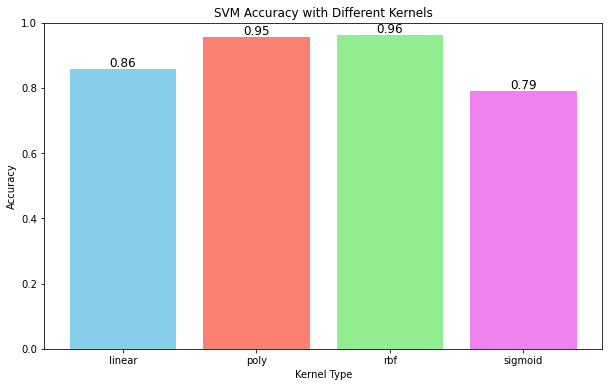

Overall accuracy using all features: 0.96


In [11]:
from sklearn.svm import SVC
# Define the kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

# Train SVM with each kernel and store the accuracy
for kernel in kernels:
    svc = SVC(kernel=kernel, random_state=0)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracies as a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(kernels, accuracies, color=['skyblue', 'salmon', 'lightgreen', 'violet'])
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy with Different Kernels')
plt.ylim(0, 1)  # Setting y-axis limit for easier comparison

# Display decimal values on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height (accuracy) of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval,  # Place text slightly above each bar
             f'{yval:.2f}', ha='center', va='bottom', fontsize=12)  # Format as decimal with 2 places
    
plt.show()

clf = SVC(random_state=0)
clf.fit(X_train, y_train)

y_pred_all = clf.predict(X_test)
overall_accuracy = accuracy_score(y_test, y_pred_all)

# Print overall accuracy
print(f"Overall accuracy using all features: {overall_accuracy:.2f}")

# K Nearest Neighbors

In [12]:
knn_scores = []
for k in range(2,21) :
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_score=round(knn_classifier.score(X_test, y_test),2)
    knn_scores.append(knn_score)
knn_classifier = KNeighborsClassifier(n_neighbors= 5)
knn_classifier.fit(X_train, y_train)
knn_score=knn_classifier.predict(X_test)
print (classification_report(y_test,knn_score))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       145
           1       0.88      0.88      0.88       163

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308



Text(0.5, 1.0, 'KNN Scores for different K neighbouras')

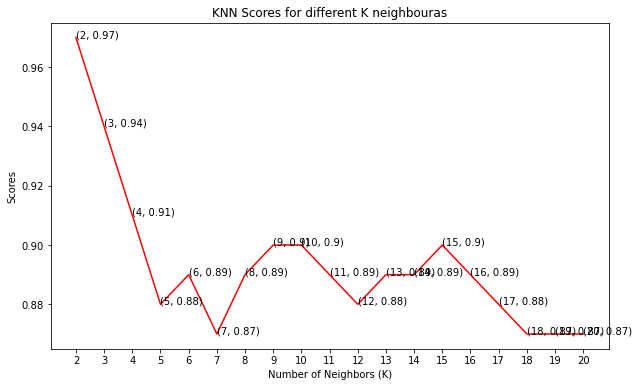

In [13]:
plt.figure(figsize=(10, 6))
plt.plot([k for k in range(2, 21)], knn_scores, color = 'red')
for i in range (2,21):
    plt. text(i, knn_scores[i-2], (i, knn_scores[i-2]))
plt.xticks([i for i in range(2, 21)])
plt.xlabel( 'Number of Neighbors (K)')
plt. ylabel('Scores')
plt.title('KNN Scores for different K neighbouras')

# Decision Tree

In [14]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(round(dt_classifier.score(X_test, y_test),2))
print ("Done")

Done


In [15]:
print(dt_scores)

[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0, 1.0, 0.98, 1.0, 0.99, 0.99]


In [16]:
dt_classifier = DecisionTreeClassifier(max_features = 13, random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_features=13, random_state=0)

Text(0.5, 1.0, 'Decision Tree Classifier  scores for different number of maximum features')

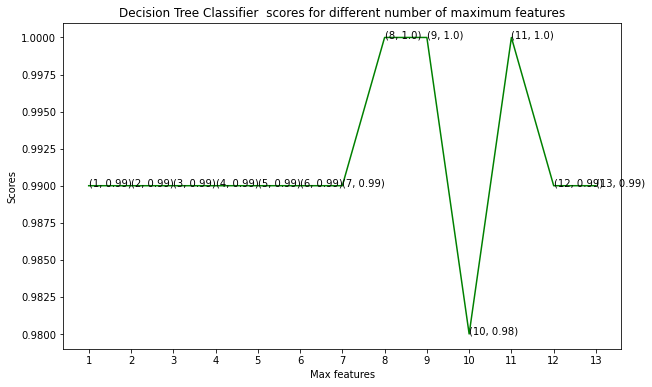

In [17]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i,dt_scores[i-1]))
plt.xticks([i for i in  range(1, len(X.columns) +1)])
plt.xlabel( 'Max features')
plt. ylabel('Scores')
plt.title("Decision Tree Classifier  scores for different number of maximum features")

# Logistic Regression

In [18]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train,y_train)

y_pred_lr = logistic_model.predict(X_test)

In [19]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
print(classification_report(y_test, y_pred_lr))

The accuracy score achieved using Logistic Regression is: 86.69 %
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       145
           1       0.84      0.92      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.86      0.87       308
weighted avg       0.87      0.87      0.87       308



# Random Forest

### I have taken estimatore as 100

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model using the training set
rf_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[145   0]
 [  0 163]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



# Bar Graph based on all accuracies obtained by different algoritms

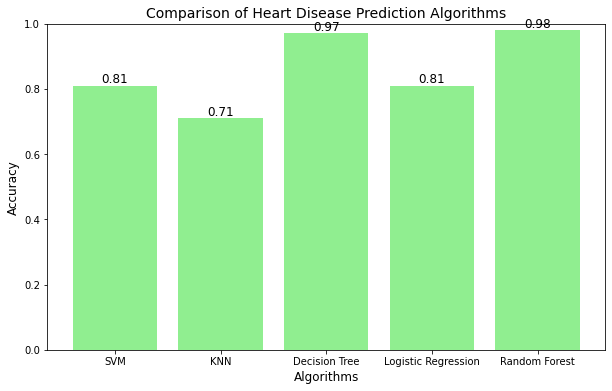

In [21]:
import matplotlib.pyplot as plt

algorithms = ['SVM', 'KNN', 'Decision Tree','Logistic Regression', 'Random Forest']
accuracies = [0.81, 0.71, 0.97, 0.81, 0.98]  

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracies, color='lightgreen')

# Add accuracy scores on top of each bar
for bar in bars:
    height = bar.get_height()  # Get the height of the bar (accuracy score)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Heart Disease Prediction Algorithms', fontsize=14)

# Display the plot
plt.ylim(0, 1)  # To ensure the accuracy values are within the 0-1 range
plt.show()


# Save Models in file

In [22]:
'''import pickle

all_models=[rf_model, logistic_model,dt_classifier,svc, knn_classifier]
with open ("models.pkl",'wb') as files:
    pickle.dump (all_models, files)
print ("Models saved successfully.")'''

import joblib

# Assuming you have your trained models in variables: svm_model, dt_model, lr_model, rf_model

# Save models to files
joblib.dump(svc, 'svm_model.pkl')
joblib.dump(dt_classifier, 'dt_model.pkl')
joblib.dump(logistic_model, 'lr_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(knn_classifier, 'knn_classifier.pkl')

['knn_classifier.pkl']

# Heart Disease Prediction using Deep Learning Algorithms

# Feedforward Neural Networks(FNN)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

# Build FNN model
fnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
fnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = fnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = (fnn_model.predict(X_test) > 0.5).astype("int32")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Epoch 1/50
18/18 [==============================] - 3s 39ms/step - loss: 0.7101 - accuracy: 0.5096 - val_loss: 0.5669 - val_accuracy: 0.7361
Epoch 2/50
18/18 [==============================] - 0s 10ms/step - loss: 0.5224 - accuracy: 0.7818 - val_loss: 0.4565 - val_accuracy: 0.8333
Epoch 3/50
18/18 [==============================] - 0s 9ms/step - loss: 0.4256 - accuracy: 0.8360 - val_loss: 0.3987 - val_accuracy: 0.8333
Epoch 4/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3766 - accuracy: 0.8464 - val_loss: 0.3657 - val_accuracy: 0.8056
Epoch 5/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3440 - accuracy: 0.8534 - val_loss: 0.3469 - val_accuracy: 0.8333
Epoch 6/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3248 - accuracy: 0.8691 - val_loss: 0.3346 - val_accuracy: 0.8125
Epoch 7/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3079 - accuracy: 0.8691 - val_loss: 0.3269 - val_accuracy: 0.8403
Epoch 8/50
18/18 [

# Multilayer Perceptrons(MLP)

In [27]:
# Build the MLP model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


# Compile the model
mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Epoch 1/100
18/18 [==============================] - 7s 74ms/step - loss: 0.7839 - accuracy: 0.5742 - val_loss: 0.6273 - val_accuracy: 0.7083
Epoch 2/100
18/18 [==============================] - 0s 14ms/step - loss: 0.6467 - accuracy: 0.6614 - val_loss: 0.5918 - val_accuracy: 0.7708
Epoch 3/100
18/18 [==============================] - 0s 14ms/step - loss: 0.5933 - accuracy: 0.6928 - val_loss: 0.5682 - val_accuracy: 0.7500
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 0.5506 - accuracy: 0.7243 - val_loss: 0.5441 - val_accuracy: 0.7431
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 0.5064 - accuracy: 0.7627 - val_loss: 0.5192 - val_accuracy: 0.7708
Epoch 6/100
18/18 [==============================] - 0s 15ms/step - loss: 0.4950 - accuracy: 0.7644 - val_loss: 0.4998 - val_accuracy: 0.7708
Epoch 7/100
18/18 [==============================] - 0s 12ms/step - loss: 0.4666 - accuracy: 0.7609 - val_loss: 0.4819 - val_accuracy: 0.7778
Epoch 

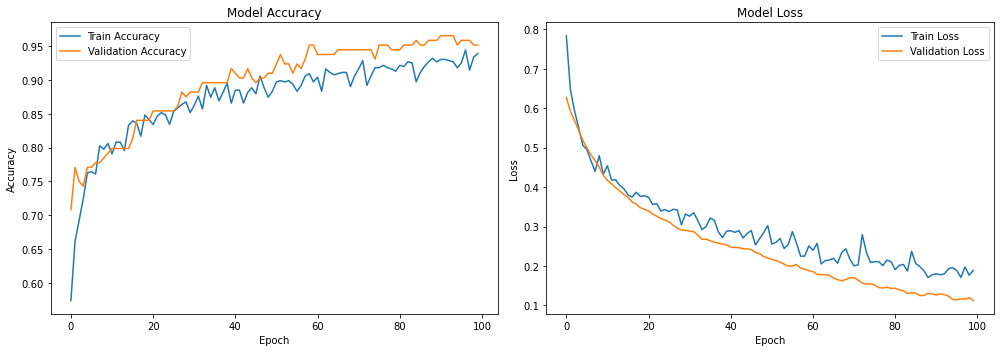

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


# Deep Neural Network

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

# Build the DNN model
dnn_model = Sequential()
dnn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(Dropout(0.3))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dropout(0.3))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
dnn_model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = dnn_model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=32, 
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the test set
y_pred = (dnn_model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Epoch 1/50
18/18 [==============================] - 4s 43ms/step - loss: 0.5987 - accuracy: 0.7051 - val_loss: 0.4947 - val_accuracy: 0.7917
Epoch 2/50
18/18 [==============================] - 0s 12ms/step - loss: 0.4720 - accuracy: 0.7836 - val_loss: 0.4130 - val_accuracy: 0.7847
Epoch 3/50
18/18 [==============================] - 0s 9ms/step - loss: 0.4080 - accuracy: 0.8115 - val_loss: 0.3892 - val_accuracy: 0.8125
Epoch 4/50
18/18 [==============================] - 0s 11ms/step - loss: 0.3721 - accuracy: 0.8447 - val_loss: 0.3733 - val_accuracy: 0.8056
Epoch 5/50
18/18 [==============================] - 0s 12ms/step - loss: 0.3794 - accuracy: 0.8325 - val_loss: 0.3599 - val_accuracy: 0.8056
Epoch 6/50
18/18 [==============================] - 0s 10ms/step - loss: 0.3648 - accuracy: 0.8272 - val_loss: 0.3417 - val_accuracy: 0.8750
Epoch 7/50
18/18 [==============================] - 0s 11ms/step - loss: 0.3483 - accuracy: 0.8604 - val_loss: 0.3484 - val_accuracy: 0.8472
Epoch 8/50
18/

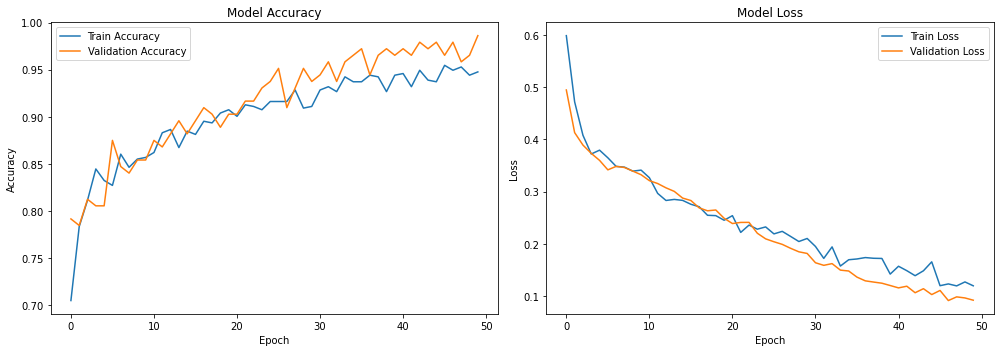

In [32]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Bar Graph based on all accuracies obtained by different algoritms

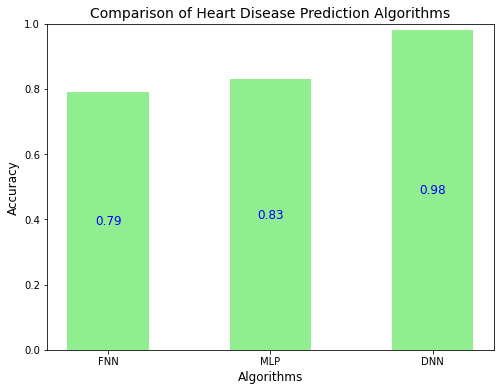

In [33]:
import matplotlib.pyplot as plt

algorithms = ['FNN', 'MLP', 'DNN']
accuracies = [0.79, 0.83, 0.98]  

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, accuracies, color='lightgreen', width=0.5)

# Add the accuracy value inside each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (accuracy value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', color='blue', fontsize=12)

# Add labels and title
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Heart Disease Prediction Algorithms', fontsize=14)

# Display the plot
plt.ylim(0, 1)  # To ensure the accuracy values are within the 0-1 range
plt.show()

In [25]:
import joblib

# Save each model
joblib.dump(fnn_model, 'fnn_model.pkl')
joblib.dump(mlp_model, 'mlp_model.pkl')
joblib.dump(dnn_model, 'dnn_model.pkl')

print("Models saved successfully!")

Models saved successfully!


# Conclusion

### Heart Disease Prediction Accuracies based on Machine Learning Algorithms such as:
- Support Vector Machine(SVM) : Accuracy is 68%
- K Nearest Neighbors(KNN)    : Accuracy is 71%
- Decision Tree               : Accuracy is 97%
- Logistic Regression         : Accuracy is 81%
- Random Forest               : Accuracy is 98%
### The best accuracy was obtained in Random Forest  & Decision Tree.

### Heart Disease Prediction Accuracies based on Machine Learning Algorithms such as:
- Feedforward Neural Networks(FNN) : Accuracy is 99%
- Multilayer Perceptrons(MLP)      : Accuracy is 97%
- Deep Neural Network              : Accuracy is 100%
### The best accuracy was obtained in Deep Neural Network.

# Finally I conclude that the best accuracy was obtained using Deep neural Network with many hidden layers